In [2]:
import os
import random
import pandas as pd
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_dir = 'archive_7/animal_images'

In [4]:
labels=pd.read_csv('archive_7/animal_data_img.csv')
labels

,Label,Animal_Type,Image_File
0,indian ringneck,Bird,animal_images/1633802583762_Indian Ringneck fo...
1,rottweiler puppy,Dog,animal_images/1633802583996_Rottweiler Puppy f...
2,rabbit,Rabbit,animal_images/1633802584211_Rabbit for sale.jpg
3,cokatail bird,Bird,animal_images/1633802584412_Cokatail bird for ...
4,apple konda pigeon,Bird,animal_images/1633802584634_Apple Konda Pigeon...
...,...,...,...
11954,à¶à·à¶à¶§à·à¶½à· à¶à·à¶»à·à¶½à·à¶½à¶±...,Bird,animal_images/1635693720508_à¶à·à¶à¶§à·à¶½...
11955,racing homer pigeons,Bird,animal_images/1635693743986_Racing Homer Pigeo...
11956,buruma aseel,Bird,animal_images/1635693744873_Buruma Aseel for s...
11957,pigeons,Bird,animal_images/1635693746008_Pigeons for sale.jpg


In [5]:
Name = labels['Animal_Type'].unique().tolist()
print(Name)
print(len(Name))

['Bird', 'Dog', 'Rabbit', 'Fish', 'Cat', 'Guinea pig / mouse', 'Other']
7


In [6]:
N=list(range(len(Name)))    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

In [7]:
labels['label']=labels['Animal_Type'].map(normal_mapping)
files = labels['Image_File'].unique().tolist()
print(files[0:10])
print(len(files))

['animal_images/1633802583762_Indian Ringneck for sale.jpg', 'animal_images/1633802583996_Rottweiler Puppy for sale.jpg', 'animal_images/1633802584211_Rabbit for sale.jpg', 'animal_images/1633802584412_Cokatail bird for sale.jpg', 'animal_images/1633802584634_Apple Konda Pigeon for sale.jpg', 'animal_images/1633802584820_Racing homer pigeon for sale.jpg', 'animal_images/1633802585026_à·\x80à·\x92à¶\x9aà·\x92à¶±à·\x92à¶¸à¶§ for sale.jpg', 'animal_images/1633802585233_Koi carf for sale.jpg', 'animal_images/1633802585380_White Parrot Fish for sale.jpg', 'animal_images/1633802585555_Sig Sag Eel for sale.jpg']
11959


In [8]:
dataset = []

for i in tqdm(range(len(labels))):
    labeli = labels.loc[i, 'label']
    filei = labels.loc[i, 'Image_File']
    path = os.path.join(data_dir, filei)
    img1 = cv2.imread(path)
    if img1 is not None:
        img2 = cv2.resize(img1, dsize=(40, 40), interpolation=cv2.INTER_CUBIC)
        img3 = img2.astype(np.float32)
        image = torch.from_numpy(img3).permute(2, 0, 1)
        dataset.append([image, labeli])
    else:
        print(f"Failed to read image at path: {path}")

  0%|          | 0/11959 [00:00<?, ?it/s]

  0%|          | 18/11959 [00:00<07:13, 27.53it/s] 

Failed to read image at path: archive_7/animal_images\animal_images/1633802585026_à·à·à¶à·à¶±à·à¶¸à¶§ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633802586143_à·à¶§à· à¶à·à¶»à·à¶½à·à¶½à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633802587851_à®¨à®¾à®à¯à®à¯ à®à¯à®´à®¿ for sale.jpg


  0%|          | 49/11959 [00:01<03:01, 65.69it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633802609493_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633802632970_Guinea pigs à¶à·à¶±à· à¶´à·à¶à· for sale.jpg


  1%|          | 71/11959 [00:01<02:24, 82.55it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633802633520_à¶´à¶»à·à·à¶ºà·à¶±à· for sale.jpg


  1%|          | 114/11959 [00:01<02:03, 95.86it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633802662722_à¶¢à¶»à·à¶¸à¶±à· à·à·à¶´à¶§à· à¶´à·à¶§à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633802687316_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg


  1%|▏         | 159/11959 [00:02<01:52, 104.77it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633802710569_Pomeranian à¶´à·à¶§à·à·à¶±à· for sale.jpg


  2%|▏         | 182/11959 [00:02<01:52, 104.53it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633802764975_à®à®à¯ à®®à¯à®¯à®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633802765824_à¶à·à¶±à·à¶´à·à¶à· for sale.jpg


  2%|▏         | 275/11959 [00:03<01:46, 109.33it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633802904952_ð¥Double Side Imported Rottweiler Male Puppies for sale.jpg


  3%|▎         | 310/11959 [00:03<01:49, 105.96it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633802963519_Angora rabbits à¶à¶±à·à¶à·à¶»à· à·à· à¶´à¶§à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633802965177_Angora rabbits à¶à¶±à·à¶à·à¶»à· à·à· à¶´à¶§à·à· for sale.jpg


  3%|▎         | 321/11959 [00:03<01:50, 105.29it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633802993256_à¶¢à¶»à·à¶¸à¶±à· â£à·à·à¶´à¶§à· for sale.jpg


  3%|▎         | 342/11959 [00:04<02:24, 80.28it/s] 

Failed to read image at path: archive_7/animal_images\animal_images/1633802995915_à¶¢à¶¸à¶±à· à·à·à¶´à¶§à· à¶´à·à¶§à·à·  Long Coat for sale.jpg


  3%|▎         | 374/11959 [00:04<02:10, 88.47it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803019553_à¶½à¶ºà¶±à· à·à·à¶´à¶©à· for sale.jpg


  3%|▎         | 408/11959 [00:04<01:55, 99.86it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803080571_à¶»à·à¶§à·à·à¶ºà·à¶½à¶»à· à¶´à¶´à· for sale.jpg


  5%|▍         | 560/11959 [00:06<01:40, 113.03it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803277082_à®à®à¯à®®à¯à®¯à®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803280742_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg


  5%|▍         | 583/11959 [00:06<01:48, 104.67it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803299831_à¶à·à¶±à·à¶´à·à¶à· for sale.jpg


  6%|▌         | 681/11959 [00:07<01:33, 120.76it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803449369_à·à·à¶¯à· à¶¸à¶à·à¶»à· à¶¸à¶­à·à·à¶ºà· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803449987_à¶¢à·à·à· à·à·à¶±à·à¶ à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803450219_à®®à¯à®¯à®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803450889_à®à®¾à®à¯ à®ªà¯à®±à®¾ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803451222_Rottweiler Puppiesâ for sale.jpg


  6%|▌         | 731/11959 [00:07<01:40, 111.95it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803494239_à®®à¯à®¯à®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803494587_à¶­à·à¶´à·à¶´à·à¶½à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803498250_Malawi Above 4â Cichlid for sale.jpg


  7%|▋         | 780/11959 [00:08<01:40, 111.15it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803546910_à®à®¾à®à¯ à®ªà¯à®±à®¾à®à¯à®à®³à¯ for sale.jpg


  7%|▋         | 803/11959 [00:08<01:48, 103.28it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803574209_à®ªà®¿à®©à¯à®à¯à®¸à¯ for sale.jpg


  7%|▋         | 850/11959 [00:09<01:43, 107.31it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803601087_à¶©à·à¶½à·à¶¸à·à·à¶±à· à¶´à·à¶§à·à· for sale.jpg


  8%|▊         | 897/11959 [00:09<01:42, 107.47it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803647223_à·à¶½à· à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803673082_à®µà¯à®²à¯à®²à®à®¿à®¯à®£à¯ for sale.jpg


  8%|▊         | 933/11959 [00:09<01:42, 107.97it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803696524_à¶à·à·à¶½à· à¶à·à¶à·à¶½à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803699178_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803725567_à®®à¯à®¯à®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803725946_à¶»à·à¶§à·à·à·à¶½à¶»à· à¶¶à¶½à· à¶´à·à¶§à·à·à¶à· for sale.jpg


  8%|▊         | 968/11959 [00:10<01:38, 111.14it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803729443_à¶¸à·à¶¶à¶½à· à¶à·à¶§à· à·à·à·à· for sale.jpg


  8%|▊         | 1012/11959 [00:10<02:40, 68.31it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803784994_à¶à¶´à·à¶´à· à¶¸à·à·à¶±à· for sale.jpg


  9%|▊         | 1034/11959 [00:11<02:14, 81.44it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803806678_à¶»à·à¶§à·à·à¶ºà¶½à¶»à· à¶´à·à¶»à·à¶¸à· à¶´à·à¶§à·à·à¶à· for sale.jpg


  9%|▉         | 1113/11959 [00:11<01:57, 92.04it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803945778_Tedy Pigeon à¶§à·à¶©à· à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803945955_Pigeon à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803946686_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803948014_à®®à¯à®¯à®²à¯ for sale.jpg


  9%|▉         | 1134/11959 [00:12<01:54, 94.74it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633803949555_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803973533_Guinea pigs à¶à·à¶±à· à¶´à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803973866_Guinea pigs à¶à·à¶±à· à¶´à·à¶à· à·à¶­à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633803974026_à·à·à·à¶±à· for sale.jpg


 10%|█         | 1196/11959 [00:12<01:39, 108.06it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804025371_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg


 10%|█         | 1230/11959 [00:13<01:48, 98.77it/s] 

Failed to read image at path: archive_7/animal_images\animal_images/1633804051871_à·à·à¶½à·à¶»à·à·à·à¶±à· à·à·à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633804087385_à¶à¶±à¶»à·à¶ à¶­à¶­à·à·à¶ºà· à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg


 11%|█         | 1280/11959 [00:13<02:08, 83.37it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804129401_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633804156687_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633804156850_à¶½à·à¶±à·à¶à· à¶à·à¶§à· à¶¢à¶»à·à¶¸à¶±à· à·à¶´à¶©à· à¶´à¶´à· for sale.jpg


 11%|█         | 1302/11959 [00:13<02:04, 85.65it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804157605_à¶´à¶»à·à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633804177361_Platy à¶´à·à¶½à·à¶§à· à¶´à·à¶§à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633804178210_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 11%|█         | 1331/11959 [00:14<02:09, 82.03it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804181133_à·à¶ºà·à¶§à¶»à· for sale.jpg


 12%|█▏        | 1390/11959 [00:15<02:15, 77.72it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804255275_à¶»à¶±à· à¶¸à·à·à· for sale.jpg


 12%|█▏        | 1406/11959 [00:15<02:28, 71.07it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804277704_à®®à¯à®¯à®²à¯ à®à¯à®à¯à®à®¿à®à®³à¯ for sale.jpg


 12%|█▏        | 1470/11959 [00:16<02:34, 67.72it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804338363_à·à·à·à¶±à· for sale.jpg


 13%|█▎        | 1533/11959 [00:17<01:58, 87.91it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804420994_à¶¸à¶© à¶´à·à¶à·à¶«à· à·à¶³à·à· à¶à·à·à· à¶´à·à¶§à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633804421172_à·à¶ºà· à¶´à·à¶±à· ââà·à·à¶§à· à¶§à·à¶½à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633804421362_à®µà¯à®³à¯à®³à¯à®à®¿à®¯à®©à¯ à®à¯à®´à®¿à®à®³à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633804422775_à¶´à·à¶¸à·à¶±à·à¶»à·à¶ºà¶±à· à¶¶à¶½à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 13%|█▎        | 1577/11959 [00:17<02:16, 76.17it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804446884_à¶´à·à¶½à·à¶§à·à¶½à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633804447765_à¶¶à·à¶±à·à¶§à¶¸à· for sale.jpg


 13%|█▎        | 1586/11959 [00:18<02:12, 78.19it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804481248_à¶à·à¶±à·à¶¯à·à¶­à·à¶½à·à¶´à·à¶º for sale.jpg


 14%|█▎        | 1626/11959 [00:18<02:30, 68.48it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804506496_à¶´à¶»à·à·à·à¶à·à¶½à· à¶¸à·à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633804530290_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg


 14%|█▍        | 1650/11959 [00:19<02:21, 72.91it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804531277_à¶à·à· à¶¸à·à·à¶±à· for sale.jpg


 14%|█▍        | 1667/11959 [00:19<02:13, 77.03it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804556501_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ à®à¯à®´à®¿à®à®³à¯ for sale.jpg


 14%|█▍        | 1692/11959 [00:19<02:12, 77.49it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804583504_à·à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 14%|█▍        | 1731/11959 [00:20<02:32, 66.99it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804639298_à®®à¯à®¯à®²à¯ for sale.jpg


 15%|█▍        | 1740/11959 [00:20<02:20, 72.49it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804641891_à¶´à¶»à·à·à·à¶ºà¶±à· for sale.jpg


 15%|█▍        | 1770/11959 [00:20<01:56, 87.20it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804666953_à¶à·à· à·à·à¶¯à· à¶à¶½à· à¶à·à¶»à·à¶½à·à¶½à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633804691244_à¶¢à¶¸à¶±à· à·à¶´à¶§à·  German Shepherd for sale.jpg


 15%|█▌        | 1837/11959 [00:21<01:51, 90.61it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804754327_à¶à·à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633804780875_à®¨à¯à®£à¯à® à®µà®¾à®²à¯ à®ªà¯à®©à®¿à®à¯à®¸à¯ à®à¯à®µà®²à¯ for sale.jpg


 16%|█▌        | 1886/11959 [00:22<05:01, 33.43it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804812323_à¶¸à·à¶¶à¶½à· à¶à·à¶§à· à·à·à·à·  Mable Cat Fish for sale.jpg


 16%|█▌        | 1933/11959 [00:23<03:51, 43.33it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804866550_à¶à¶³à· à¶¸à·à¶½à·à·à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633804889597_à·à·à·à·à¶­à·à¶»à· à¶¸à·à·à¶±à· for sale.jpg


 16%|█▋        | 1948/11959 [00:24<03:12, 52.02it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804890531_à·à·à·à·à¶­à·à¶»à· à¶¸à·à·à¶±à· à·à¶»à·à¶ for sale.jpg


 17%|█▋        | 1991/11959 [00:25<04:37, 35.94it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804938794_à·à·à·à·à¶­à·à¶»à· à¶¸à·à·à¶±à· for sale.jpg


 17%|█▋        | 2004/11959 [00:25<03:25, 48.35it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633804941131_à¶½à·à¶¶à·âà¶»à¶©à· à¶¶à¶½à·à¶½à¶±à· for sale.jpg


 17%|█▋        | 2040/11959 [00:26<03:33, 46.43it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805049655_à¶¢à·à¶±à· à¶à·à¶»à·à¶¸à· for sale.jpg


 17%|█▋        | 2055/11959 [00:27<05:47, 28.52it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805052864_à®ªà¯à®°à®¿à®¯ à®®à¯à®¯à®²à¯ à®à¯à®à¯à®à®¿ à®®à¯à®¯à®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805053334_Jerman Shepard à¶¶à¶½à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 18%|█▊        | 2101/11959 [00:28<03:27, 47.53it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805103281_à®à®à¯à®à¯à®°à®¾ à®®à¯à®¯à®²à¯ for sale.jpg


 18%|█▊        | 2130/11959 [00:28<03:31, 46.46it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805128844_Love Birds  à¶à·à¶»à·à¶½à·à¶½à· 10 for sale.jpg


 18%|█▊        | 2163/11959 [00:29<03:06, 52.51it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805176094_à¶½à¶ºà¶±à·à·à·à¶´à¶§à· à¶´à·à¶§à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805176764_à¶»à¶±à·à¶ à· à¶à·à¶½à·à·à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805176980_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ for sale.jpg


 18%|█▊        | 2203/11959 [00:30<02:40, 60.84it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805200662_à¶»à¶­à·à¶¯à·à¶½à· à¶¸à·à·à· 3 à¶à· for sale.jpg


 19%|█▉        | 2253/11959 [00:31<02:52, 56.25it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805247153_à¶»à¶­à· à¶à·à· à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg


 19%|█▉        | 2291/11959 [00:31<02:48, 57.39it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805295514_à¶ºà·à¶¯ à¶à·à¶»à·à¶¸à· à¶¯à·à¶ 45cm for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805296347_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 19%|█▉        | 2327/11959 [00:32<02:38, 60.59it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805326205_à¶à¶¢à·à¶´à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805344595_Hamsters  à·à¶¸à·à·à·à¶§à·à¶»à· à·à¶­à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805345053_à¶¢à¶¸à¶±à·à·à·à¶´à¶©à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805345744_à¶à·à¶±à· à¶´à·à¶à· à·à¶­à·à¶±à· Guinea Pigs for sale.jpg


 20%|█▉        | 2368/11959 [00:33<03:17, 48.44it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805371732_à¶¢à¶ºà¶±à·à¶§à· à¶à·à¶»à·à¶¸à· for sale.jpg


 20%|█▉        | 2380/11959 [00:33<03:08, 50.86it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805392783_à¶»à·à¶©à· à¶à·à¶¸à¶±à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805393703_à®®à¯à®¯à®²à¯ for sale.jpg


 20%|██        | 2422/11959 [00:34<02:59, 53.26it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805421429_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805422617_à·à·à·à¶±à· for sale.jpg


 21%|██        | 2491/11959 [00:35<02:31, 62.48it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805494634_à®®à¯à®¯à®²à¯à®à®³à¯ for sale.jpg


 21%|██        | 2532/11959 [00:36<03:17, 47.74it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805543318_à®ªà¯à®°à¯à®à¯ à®à¯à®µà®²à¯ for sale.jpg


 22%|██▏       | 2605/11959 [00:38<02:51, 54.39it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805616213_à®ªà®¾à®à®¿à®¸à¯à®¤à®¾à®©à¯ à®±à¯à®à®°à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805616652_à¶à¶±à·à¶¢à¶½à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805618728_à®®à¯à®¯à®²à¯ for sale.jpg


 22%|██▏       | 2635/11959 [00:38<02:40, 57.95it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805640270_à¶±à·à¶»à·à¶à· à¶¸à·à·à¶±à· for sale.jpg


 22%|██▏       | 2651/11959 [00:39<04:47, 32.40it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805658463_à·à¶ºà· à¶¶à·à¶à· à¶à·à¶½à·à¶©à·à¶©à¶±à· à¶à¶»à·à·à·à¶±à· for sale.jpg


 22%|██▏       | 2683/11959 [00:40<02:42, 57.01it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805683805_à®®à¯à®à®®à®¾à®²à¯ à®ªà¯à®±à®¾ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805684575_à®®à¯à®¯à®²à¯ à®à¯à®à¯à®à®¿à®à®³à¯ for sale.jpg


 23%|██▎       | 2705/11959 [00:40<02:36, 59.30it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805709464_à¶ºà·à¶° à¶à·à¶»à·à¶¸à· for sale.jpg


 23%|██▎       | 2729/11959 [00:41<03:38, 42.29it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805733813_à¶à·à· à¶¸à·à·à¶±à· for sale.jpg


 23%|██▎       | 2753/11959 [00:41<03:14, 47.40it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805758469_à·à·à¶»à·à¶¸à· à¶´à·à¶§à·à· for sale.jpg


 23%|██▎       | 2806/11959 [00:42<02:44, 55.55it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805805932_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 24%|██▍       | 2848/11959 [00:43<02:42, 56.04it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805857813_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 24%|██▍       | 2867/11959 [00:43<02:43, 55.61it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805886953_à®à®à®¿à®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805887301_à®à®à¯ à®®à¯à®¯à®²à¯ for sale.jpg


 24%|██▍       | 2895/11959 [00:44<03:55, 38.41it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805912103_Red Eyes Anger Wool Rabbit à®µà¯à®³à¯à®³à¯ for sale.jpg


 25%|██▍       | 2956/11959 [00:45<02:32, 59.11it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633805963274_à¶´à¶»à·à·à¶ºà· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633805985456_à·à· à¶´à·à¶§à·à· for sale.jpg


 25%|██▌       | 2999/11959 [00:46<02:23, 62.44it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806018616_à¶à·à·à· à¶¸à·à¶½à· Koi fish for sale.jpg


 25%|██▌       | 3027/11959 [00:47<02:31, 58.96it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806040791_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806041064_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ à®à¯à®µà®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806062183_à¶´à·à¶¢à¶±à·  à¶´à¶»à¶ºà· for sale.jpg


 25%|██▌       | 3046/11959 [00:47<02:47, 53.28it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806064336_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg


 26%|██▌       | 3073/11959 [00:47<02:46, 53.23it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806091543_à¶à·à¶½à·à¶©à· à·à·à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806108441_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ à®à¯à®µà®²à¯ for sale.jpg


 26%|██▌       | 3085/11959 [00:48<03:01, 48.76it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806109866_à¶´à¶»à·à·à¶ºà· for sale.jpg


 26%|██▌       | 3107/11959 [00:48<03:03, 48.17it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806136188_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 26%|██▋       | 3162/11959 [00:49<02:43, 53.84it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806186911_à¶¸à¶­à·à·à¶ºà¶±à· for sale.jpg


 27%|██▋       | 3212/11959 [00:50<02:58, 48.96it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806232144_à·à¶§à· à¶à·à¶»à·à¶½à·à¶½à¶±à· à¶à·à¶©à·à·Quail Birds for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806233315_à®à®£à¯ à®à®à¯ à®®à¯à®¯à®²à¯ for sale.jpg


 27%|██▋       | 3224/11959 [00:51<02:51, 50.88it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806252292_à·à·à¶±à· à·à¶ºà·à¶§à· à¶à¶´à·à¶´à· for sale.jpg


 27%|██▋       | 3265/11959 [00:52<02:57, 48.88it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806285744_à¶à·à¶±à·à¶´à·à¶à· Long Hair for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806312118_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 27%|██▋       | 3285/11959 [00:52<03:19, 43.40it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806314144_à·à·à¶»à· à¶à¶´à·à¶´à· for sale.jpg


 28%|██▊       | 3303/11959 [00:53<03:58, 36.35it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806336312_à¶à¶´à·à¶´à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806336976_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg


 28%|██▊       | 3326/11959 [00:53<03:33, 40.44it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806360536_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg


 28%|██▊       | 3345/11959 [00:54<03:35, 40.01it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806385604_à·à¶ºà·à¶§à·à· for sale.jpg


 28%|██▊       | 3361/11959 [00:54<03:14, 44.16it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806387729_à¶´à·à¶»à¶§à· à¶¶à·à¶à· for sale.jpg


 28%|██▊       | 3370/11959 [00:54<04:45, 30.08it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806410555_à¶à·à¶»à·à¶¸à· à¶¯à·à¶¯à·à¶±à·à¶à· for sale.jpg


 28%|██▊       | 3407/11959 [00:56<03:35, 39.71it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806433885_à¶¶à·à¶½à·à¶¸à·à·à¶§à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806434586_à¶à·à¶»à·à¶¸à· à¶¸à·à·à¶±à· for sale.jpg


 29%|██▊       | 3429/11959 [00:56<03:17, 43.17it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806458054_à¶¡à¶»à·à¶¸à¶±à· à·à·à·à¶»à·à¶©à· à¶´à·à¶§à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806458405_à¶»à·à¶©à·à¶´à·à¶±à· à¶à·à¶»à·à¶¸à· for sale.jpg


 29%|██▉       | 3440/11959 [00:56<03:02, 46.56it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806482353_à¶à¶´à·âà¶»à·à¶à¶±à· à¶à·à¶»à·à¶½à·à¶½à¶±à· for sale.jpg


 29%|██▉       | 3473/11959 [00:57<03:58, 35.51it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806505001_à®®à¯à®¯à®²à¯ for sale.jpg


 29%|██▉       | 3489/11959 [00:58<03:28, 40.68it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806529322_à¶¶à·à¶à¶½à· à¶¶à¶½à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 30%|██▉       | 3561/11959 [00:59<03:03, 45.68it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806580146_à¶½à¶ºà¶±à· à¶´à·à¶¸à¶±à·à¶»à·à¶ºà¶±à· for sale.jpg


 30%|██▉       | 3578/11959 [01:00<03:09, 44.32it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806600203_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806600595_à®¨à®¾à®à¯à®à¯ à®à¯à®µà®²à¯ for sale.jpg


 30%|███       | 3610/11959 [01:01<03:00, 46.30it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806629895_à¶à·à·à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 30%|███       | 3621/11959 [01:01<03:05, 44.98it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806650034_à¶»à·à¶§à·à·à¶ºà¶½à¶»à· à¶¶à¶½à· à¶´à·à¶§à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806650573_à®à®°à¯ à®à¯à®µà®²à¯ for sale.jpg


 31%|███       | 3707/11959 [01:03<03:19, 41.33it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806729371_Carp à¶¸à·à·à¶±à· for sale.jpg


 31%|███       | 3730/11959 [01:04<03:08, 43.77it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806756496_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806756940_à·à·à·à·à¶­à·à¶»à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806775352_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg


 31%|███▏      | 3763/11959 [01:05<02:59, 45.76it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806804454_à·à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806804683_à¶½à¶ºà¶±à·à·à¶´à¶§à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806808213_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ à®à¯à®µà®²à¯ for sale.jpg


 32%|███▏      | 3777/11959 [01:05<04:10, 32.68it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806809813_à®ªà¯à®®à¯à®®à¯à®°à®¿à®¯à®©à¯ à®¨à®¾à®¯à¯à®à¯à®à¯à®à¯à®à®¿à®à®³à¯ for sale.jpg


 32%|███▏      | 3816/11959 [01:06<03:44, 36.20it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806858200_à®®à¯à®¯à®²à¯ for sale.jpg


 32%|███▏      | 3830/11959 [01:07<02:43, 49.65it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806880480_à¶¢à·à¶½ à¶à·à¶à·à¶½à¶ºà· à¶à·à¶à·à¶½à· for sale.jpg


 32%|███▏      | 3852/11959 [01:07<02:56, 45.91it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806884518_à¶à·à¶½à·à¶©à·à¶´à·à·à· à¶¢à·à¶©à· 50à¶à· for sale.jpg


 32%|███▏      | 3883/11959 [01:08<03:36, 37.23it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806934638_à®ªà¯à®±à®¾à®à¯à®à®³à¯ for sale.jpg


 33%|███▎      | 3893/11959 [01:08<03:10, 42.27it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806936117_à¶´à¶»à·à·à¶ºà· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806937176_à¶»à·à¶§à·à·à·à¶½à¶»à· à¶¶à¶½à· à¶´à·à¶§à·à¶ºà· for sale.jpg


 33%|███▎      | 3928/11959 [01:09<02:27, 54.30it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806964017_à·à·à·à·à¶­à·à¶»à· à¶¸à·à·à¶±à· à·à¶¸à¶ à¶§à·à¶±à·à¶à·à¶º for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806985882_Guinea pig à®à®¿à®©à®¿à®ªà¯à®ªà®¿à®à¯ for sale.jpg


 33%|███▎      | 3940/11959 [01:09<02:48, 47.53it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633806987459_à·à·à¶¸à·à·à·à¶§à¶»à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633806987655_à¶à¶´à·à¶´à· à·à·à·à· for sale.jpg


 33%|███▎      | 3957/11959 [01:10<07:21, 18.13it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807012108_à®ªà¯à®²à¯à®à®¿à®¯à®®à¯ à®·à¯à®ªà¯à®ªà®°à¯à®à¯ for sale.jpg


 33%|███▎      | 3965/11959 [01:10<05:27, 24.43it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807012950_Channa kelaarti à¶´à¶»à¶©à·à¶½à· à¶à¶±à¶ºà· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807013238_à·à·à¶»à¶­à¶½à· à·à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807013915_White Giant Gourami à¶ºà·à¶° à¶à·à¶»à·à¶¸à· for sale.jpg


 33%|███▎      | 3985/11959 [01:11<05:04, 26.22it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807039111_à¶©à·à·à·à¶à·à· à¶¸à·à·à¶±à· for sale.jpg


 33%|███▎      | 3997/11959 [01:11<04:29, 29.58it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807042365_à¶½à·à· à¶¶à¶»à·à¶©à·à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807042546_Fish à¶à·à·à¶à· à¶´à·à¶à· for sale.jpg


 34%|███▎      | 4036/11959 [01:13<03:43, 35.46it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807093473_Angora rabbits à¶à¶±à·à¶à·à¶»à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807093692_Angora rabbit à¶à¶±à·à¶à·à¶»à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807094023_Angora rabbit à¶à¶±à·à¶à·à¶»à· à·à· à¶´à¶§à·à· for sale.jpg


 34%|███▍      | 4055/11959 [01:13<03:35, 36.72it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807147866_Guinea pigs à¶à·à¶±à· à¶´à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807148220_Guinea pigs à¶à·à¶±à· à¶´à·à¶à· à·à¶­à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807149281_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807149819_Guinea pigs à¶à·à¶±à· à¶´à·à¶à· for sale.jpg


 34%|███▍      | 4067/11959 [01:13<03:43, 35.32it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807150547_CountryÂ Chicken for sale.jpg


 34%|███▍      | 4098/11959 [01:14<03:10, 41.34it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807181516_à®¨à®¾à®à¯à®à¯à®à¯à®à¯à®´à®¿ à®à¯à®µà®²à¯ for sale.jpg


 34%|███▍      | 4111/11959 [01:15<03:51, 33.86it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807207832_à¶à·à¶»à·à¶¸à· for sale.jpg


 35%|███▍      | 4129/11959 [01:15<02:58, 43.88it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807232686_à·à·à·à¶±à· à¶à·à¶©à·à·à¶­à· à·à¶¸à¶ for sale.jpg


 35%|███▍      | 4139/11959 [01:15<03:01, 43.03it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807234891_à®µà¯à®³à¯à®³à®¯à®¿à®©à¯ à®à¯à®µà®²à¯ for sale.jpg


 35%|███▍      | 4185/11959 [01:17<02:59, 43.43it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807293406_à·à·à¶»à¶­à¶½à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807295058_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ à®à¯à®µà®²à¯ for sale.jpg


 36%|███▌      | 4255/11959 [01:18<02:27, 52.10it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807367991_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ for sale.jpg


 36%|███▌      | 4268/11959 [01:19<02:34, 49.75it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807371799_à®à¯à®à¯à®à®©à¯ à®à®¿à®³à®¿à®à®³à¯ Love Birds for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807392919_à¶à¶¸à· à¶à·à¶à·à¶½à· for sale.jpg


 36%|███▌      | 4279/11959 [01:19<02:55, 43.86it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807395425_à¶à·à¶»à·à¶¸à· for sale.jpg


 36%|███▌      | 4290/11959 [01:19<03:04, 41.60it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807417769_à·à·à¶½à·à¶§à·à¶½à· à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg


 36%|███▌      | 4302/11959 [01:19<02:59, 42.55it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807419289_à¶à·à· à¶à¶½à· à¶à·à¶±à·à¶© à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807420154_à·à·à·à¶±à· for sale.jpg


 36%|███▌      | 4307/11959 [01:20<02:54, 43.90it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807421094_à¶à·à¶»à·à¶¸à· for sale.jpg


 36%|███▋      | 4349/11959 [01:21<04:09, 30.45it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807465984_à®¨à®²à¯à®² à®à®© à®®à¯à®¯à®²à¯à®à¯à®à¯à®à¯à®à®¿ for sale.jpg


 36%|███▋      | 4354/11959 [01:21<03:40, 34.44it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807468507_à®à¯à®´à®¿à®à¯à®à¯à®à¯à®à¯à®à®³à¯ for sale.jpg


 37%|███▋      | 4373/11959 [01:22<03:10, 39.85it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807488411_à¶à¶¸à· à¶à·à¶à·à¶½à· à¶´à·à¶§à·à· for sale.jpg


 37%|███▋      | 4384/11959 [01:22<02:47, 45.09it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807491602_à¶¢à¶¸à¶±à· à·à·à¶´à¶§à· à¶½à·à¶±à·à¶à·à¶©à· à¶¶à¶½à·à¶½à¶±à· for sale.jpg


 37%|███▋      | 4394/11959 [01:22<03:11, 39.47it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807513158_Zibra à¶¸à·à·à¶±à· for sale.jpg


 37%|███▋      | 4434/11959 [01:23<02:26, 51.34it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807538388_à®à¯à®µà®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807538736_à¶¢à¶»à·à¶¸à¶±à· à·à·à¶´à¶§à· à¶¶à¶½à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 37%|███▋      | 4484/11959 [01:24<02:21, 52.85it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807587936_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807611848_à¶à·à¶»à·à¶¸à· for sale.jpg


 38%|███▊      | 4516/11959 [01:25<02:24, 51.44it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807633841_à¶à·à·à· à¶¸à·à¶½à· for sale.jpg


 38%|███▊      | 4529/11959 [01:25<02:35, 47.84it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807637643_à®¤à¯à®à¯à®à¯à®´à®¿ for sale.jpg


 38%|███▊      | 4570/11959 [01:27<03:04, 40.04it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807683514_à®®à¯à®¯à®²à¯ for sale.jpg


 39%|███▊      | 4622/11959 [01:28<02:11, 55.62it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807734656_5 à¶´à·à¶à· fish for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807736849_à¶©à·à·à·à¶à·à· à¶¸à·à· à¶ºà·à·à¶½ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807737163_à¶à·à·à¶à· à¶¸à·à·à¶±à· for sale.jpg


 39%|███▉      | 4648/11959 [01:28<03:28, 35.10it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807759313_Guinea Pig à¶à·à¶±à· à¶´à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807760300_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ à®à®¾à®®à¯à®¸à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807781439_à¶à¶½à·à·à¶±à·à¶§à· à·à¶ºà·à¶§à·à· for sale.jpg


 39%|███▉      | 4682/11959 [01:29<02:39, 45.72it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807786400_à¶¢à¶ºà¶±à·à¶©à· à¶à·à¶»à¶¸à· à¶¸à¶­à·à·à·âà¶ºà¶ºà·à¶à· for sale.jpg


 39%|███▉      | 4719/11959 [01:30<02:30, 48.26it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807832320_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 40%|███▉      | 4757/11959 [01:31<02:28, 48.49it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807859729_à¶à·à·à¶à· à¶¸à·à¶½à· à¶¢à·à¶©à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633807860393_à¶§à¶ºà·à¶¸à·à¶±à· for sale.jpg


 40%|████      | 4827/11959 [01:33<03:56, 30.16it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633807930765_à®®à¯à®¯à®²à¯ for sale.jpg


 41%|████      | 4894/11959 [01:35<02:24, 48.77it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808003666_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 41%|████▏     | 4936/11959 [01:36<02:08, 54.70it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808058907_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808061276_à·à·à¶½à· à¶§à·à¶½à· for sale.jpg


 41%|████▏     | 4948/11959 [01:36<02:06, 55.64it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808061877_à¶à¶±à¶à¶±à·à¶­à· for sale.jpg


 41%|████▏     | 4962/11959 [01:36<02:00, 58.26it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808082983_à®à®à®¿à®²à¯ for sale.jpg


 42%|████▏     | 4993/11959 [01:37<02:37, 44.32it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808110382_à¶à·à¶©à·à¶à¶» Rooster for sale.jpg


 42%|████▏     | 5013/11959 [01:37<02:56, 39.30it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808136785_à®µà¯à®³à¯à®³à¯ à®®à¯à®¯à®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808136970_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 42%|████▏     | 5029/11959 [01:38<02:55, 39.53it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808190172_à¶à·à·âà¶»à·à¶à¶±à· à¶½à·à·à· à¶¶à·à¶»à·à¶©à· for sale.jpg


 42%|████▏     | 5049/11959 [01:38<02:49, 40.81it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808193806_à®®à¯à®¯à®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808216418_à¶à·à·à· à¶¢à·à¶©à· for sale.jpg


 42%|████▏     | 5062/11959 [01:39<02:21, 48.58it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808217056_à·à·à·à¶à·à·à¶½à· Fish for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808217219_à¶½à·à¶¶à¶©à·à¶»à· à¶´à·à¶»à·à¶¸à· à¶´à·à¶§à·à·à¶±à· ckc register for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808217489_à¶à·à·à·à¶à¶§à·âà¶»à·à·à¶½à· à¶¢à·à·à·à¶©à·à·à¶à· for sale.jpg


 43%|████▎     | 5111/11959 [01:40<02:29, 45.82it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808279450_à¶§à·à¶à·à·à·à¶§à·à¶½à·à¶»à·à¶¸à·à·à¶­à¶à· for sale.jpg


 43%|████▎     | 5185/11959 [01:42<02:08, 52.55it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808419882_à¶à·à¶»à· à¶à·à¶à·à¶½à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808421780_à¶¢à¶ºà¶±à·à¶§à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808422511_Angora rabbit à¶à¶±à·à¶à·à¶»à· à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808422676_Hamsters  à·à¶¸à·à·à·à¶§à·à¶»à· à·à¶­à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808479214_à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808479777_Guinea pigs à¶à·à¶±à· à¶´à·à¶à· for sale.jpg


 43%|████▎     | 5202/11959 [01:42<02:10, 51.94it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808481591_à¶©à·à·à·à¶à·à· à¶¸à·à·à¶±à· for sale.jpg


 44%|████▍     | 5263/11959 [01:43<02:18, 48.42it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808538496_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808566805_à·à· à¶´à·à¶§à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808567029_à·à¶ºà·à¶§à¶»à· à¶¸à·à·à¶±à· for sale.jpg


 44%|████▍     | 5277/11959 [01:44<02:08, 51.99it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808569338_à¶à·à¶à¶§à·à¶½à· à¶´à¶à·à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808569731_à¶©à·à·à·à¶à·à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 44%|████▍     | 5283/11959 [01:44<03:59, 27.88it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808570961_à·à¶ºà·à¶§à¶»à· à¶¸à·à·à¶±à· for sale.jpg


 44%|████▍     | 5302/11959 [01:45<03:09, 35.17it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808600816_à¶à·à·à¶à· à¶¸à·à·à¶±à· for sale.jpg


 44%|████▍     | 5318/11959 [01:45<04:18, 25.70it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808625975_Daphnia à¶©à·à·à·à¶±à·à¶ºà· for sale.jpg


 45%|████▍     | 5332/11959 [01:46<04:57, 22.29it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808629254_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808629527_à¶à·à·à· à¶¸à·à·à¶±à· à¶¢à·à¶©à· 300 for sale.jpg


 45%|████▍     | 5352/11959 [01:47<05:50, 18.86it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808654427_à¶à·à¶à¶§à·à¶½à· for sale.jpg


 45%|████▍     | 5377/11959 [01:48<04:19, 25.35it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808678634_à®à®à¯à®®à¯à®¯à®²à¯à®à®³à¯ for sale.jpg


 45%|████▌     | 5389/11959 [01:49<04:35, 23.83it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808700303_Rooster à®à®°à¯à®à¯à®à¯à®´à®¿ à®à¯à®à¯à®à¯à®à®³à¯  for sale.jpg


 46%|████▌     | 5465/11959 [01:52<02:53, 37.41it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808854190_à®®à¯à®¯à®²à¯ for sale.jpg


 46%|████▌     | 5483/11959 [01:53<02:50, 37.91it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808856939_à¶à·à¶à¶§à·à¶½à· à¶à·à¶»à·à¶½à·à¶½à¶±à· for sale.jpg


 46%|████▌     | 5498/11959 [01:53<02:49, 38.02it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808888955_à·à·à·à¶±à· for sale.jpg


 46%|████▌     | 5512/11959 [01:54<02:45, 38.96it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808891961_à®à®°à¯à®©à®ªà¯à®ªà¯à®±à®¾ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808918430_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 46%|████▌     | 5517/11959 [01:54<02:36, 41.27it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808918955_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ à®à¯à®µà®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633808919414_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ for sale.jpg


 46%|████▋     | 5545/11959 [01:54<02:09, 49.34it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808944637_à¶¢à¶¸à¶±à· à·à·à·à¶©à· for sale.jpg


 47%|████▋     | 5572/11959 [01:55<01:49, 58.35it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633808972287_Labrador Puppies  à¶½à·à¶¶à·âà¶»à¶©à· for sale.jpg


 47%|████▋     | 5611/11959 [01:56<01:52, 56.20it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809009696_à¶à·à¶»à·à¶±à·à¶§à·à¶à·à¶§à·à¶§à· for sale.jpg


 47%|████▋     | 5634/11959 [01:56<01:48, 58.52it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809038120_à·à· à¶´à·à¶§à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809063869_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 47%|████▋     | 5656/11959 [01:56<01:39, 63.66it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809065817_à·à·à¶»à¶­à¶½à· à¶¸à·à·à¶±à· for sale.jpg


 47%|████▋     | 5678/11959 [01:57<01:44, 59.95it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809087701_à¶à·à¶ºà· à¶à·à¶´à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809136860_à¶´à·à¶» à¶à·à¶à·à¶½à¶±à· for sale.jpg


 48%|████▊     | 5701/11959 [01:57<01:34, 66.10it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809138481_Oacar  à¶à·à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809138855_Carf à¶¢à·à¶©à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809139512_Butterfly à·à·à¶½à·à¶§à·à¶½à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809139833_à®à¯à®à¯à®à¯à®à®©à¯ 15 à®à¯à®à®¿ à®ªà¯à®±à®¾à®à¯à®à®³à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809140983_Hamsters  à·à¶¸à·à·à·à¶§à·à¶»à· à·à¶­à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809141317_Hamster  à·à¶¸à·à·à·à¶§à·à¶»à· à·à¶­à·à¶±à·à¶±à· for sale.jpg


 48%|████▊     | 5761/11959 [01:58<01:39, 62.34it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809201168_à¶à¶´à·à¶´à· à¶¸à·à·à¶±à· for sale.jpg


 49%|████▊     | 5814/11959 [01:59<01:51, 54.97it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809314862_à®¨à®¾à®à¯à®à¯ à®à¯à®µà®²à¯ for sale.jpg


 49%|████▊     | 5826/11959 [01:59<02:03, 49.66it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809317254_à¶¢à¶ºà¶±à·à¶§à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809342147_New Zealand à·à·à·à¶±à· for sale.jpg


 49%|████▉     | 5838/11959 [02:00<02:05, 48.88it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809342972_à¶¸à·à·à¶±à· for sale.jpg


 49%|████▉     | 5854/11959 [02:00<02:17, 44.47it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809346468_à¶¶à·à¶»à·à¶¸à· for sale.jpg


 49%|████▉     | 5864/11959 [02:00<02:28, 41.09it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809364109_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809365828_à¶à·à¶à¶§à·à¶½à· à¶à·à¶»à·à¶½à·à¶½à¶±à· for sale.jpg


 49%|████▉     | 5893/11959 [02:01<02:12, 45.90it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809390993_à¶¢à·à·à· à¶à·à¶»à·à¶½à·à¶½à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809392603_à®µà®¾à®©à¯ à®à¯à®´à®¿ for sale.jpg


 49%|████▉     | 5904/11959 [02:01<02:28, 40.84it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809393238_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg


 49%|████▉     | 5916/11959 [02:01<02:14, 44.98it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809419559_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809419873_Guinea pigs à¶à·à¶±à· à¶´à·à¶à· Long Hair for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809420060_Long Hair Guinea Pigs à¶à·à¶±à· à¶´à·à¶à· for sale.jpg


 50%|████▉     | 5926/11959 [02:02<02:28, 40.73it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809422219_à¶¸à·à·à· à·à¶¸à¶ à¶§à·à¶à¶à·à¶º for sale.jpg


 50%|████▉     | 5953/11959 [02:02<02:22, 42.15it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809451598_à¶¢à¶»à·à¶¸à¶±à· à·à·à¶´à¶©à· à·à¶»à·à¶à¶ºà· à¶¶à¶½à·à¶½à·à¶à· for sale.jpg


 50%|█████     | 5996/11959 [02:03<02:18, 43.10it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809503756_à¶à·à¶à·à¶§à·à¶½à· à¶à¶½à·à¶¶à·à¶±à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 50%|█████     | 6015/11959 [02:04<01:52, 52.87it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809530127_à®à®£à®¿à®²à¯ for sale.jpg


 51%|█████     | 6048/11959 [02:05<02:06, 46.76it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809557728_à®®à¯à®¯à®²à¯ for sale.jpg


 51%|█████     | 6074/11959 [02:05<02:23, 40.96it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809589082_à®ªà¯à®±à®¾à®à¯à®à®³à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809620056_à·à·à¶¶à·âà¶»à· à¶¸à·à·à¶±à· for sale.jpg


 51%|█████     | 6094/11959 [02:06<02:09, 45.25it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809623059_à¶¶à·à¶½à·à¶¸à· à¶¸à·à¶½à· à¶¸à¶½à· for sale.jpg


 51%|█████▏    | 6135/11959 [02:07<02:14, 43.44it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809674484_à¶à¶¯à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809675899_Angora rabbit à¶à¶±à·à¶à·à¶»à· à·à· à¶´à¶§à·à· for sale.jpg


 52%|█████▏    | 6172/11959 [02:08<02:19, 41.59it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809707619_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg


 52%|█████▏    | 6198/11959 [02:08<02:19, 41.44it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809733677_à¶´à¶à·à·à·à¶®à·à¶±à· à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809734044_à¶´à¶»à·à· à¶à·à¶©à·à·à¶­à· à¶à¶à·à¶à¶¸ for sale.jpg


 52%|█████▏    | 6213/11959 [02:09<02:11, 43.79it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809757038_à¶´à¶»à·à·à¶ºà· à¶à·à¶©à·à· à·à¶¸à¶ for sale.jpg


 52%|█████▏    | 6251/11959 [02:09<02:12, 43.08it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809785011_à®ªà¯à®±à®¾ 2 à®à¯à®à®¿ for sale.jpg


 53%|█████▎    | 6312/11959 [02:11<01:43, 54.79it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809854135_Dwarf Hamster  à¶©à·à·à·âà¶»à·à· à·à¶¸à·à·à·à¶§à·à¶»à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809854313_Guinea pigs à¶à·à¶±à· à¶´à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809854492_Guinea pig à¶à·à¶±à· à¶´à·à¶à· à·à¶­à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809854669_Guinea pig à¶à·à¶±à· à¶´à·à¶à· for sale.jpg


 53%|█████▎    | 6335/11959 [02:11<02:25, 38.75it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809881089_à®à®¿à®©à®¿à®à¯à®à¯à®´à®¿ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809881418_à¶à·à·à¶»à·à¶à¶±à· à¶½à·à· à¶´à¶à·à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809881917_à¶à·à¶à¶§à·à¶½à· à¶à·à¶©à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 53%|█████▎    | 6362/11959 [02:12<01:44, 53.80it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809906363_Rabbits à¶à·à¶©à·à·à¶­à· à·à¶¸à¶ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809906539_à®ªà¯à®±à®¾à®à®³à¯ for sale.jpg


 54%|█████▎    | 6404/11959 [02:13<02:10, 42.64it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809958088_à®®à¯à®à¯à®à¯à®¯à®¿à®à¯à®®à¯ à®à®¾à®à¯à®à¯à®à¯à®´à®¿ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633809959377_à¶´à·à¶±à·à¶§à·à¶½à· for sale.jpg


 54%|█████▎    | 6416/11959 [02:13<01:56, 47.69it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633809960760_à·à·à¶§à·à¶§à·à¶½à· for sale.jpg


 54%|█████▍    | 6450/11959 [02:14<02:24, 38.00it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810007457_à®ªà®¿à®©à¯à®à¯à®¸à¯ for sale.jpg


 54%|█████▍    | 6457/11959 [02:15<02:13, 41.14it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810010334_à®®à¯à®¯à®²à¯ à®à®³à¯à®³à®© for sale.jpg


 55%|█████▍    | 6519/11959 [02:16<01:51, 48.78it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810067581_à¶¶à·à¶½à·à¶¢à·à¶ºà¶¸à· à·à·à¶´à¶©à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633810088886_à¶¸à·à¶½ à¶à·à¶»à·à· for sale.jpg


 55%|█████▍    | 6541/11959 [02:17<02:16, 39.56it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810092442_à¶´à·à¶à· à¶¸à·à¶½à· for sale.jpg


 55%|█████▍    | 6553/11959 [02:17<02:01, 44.41it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810113649_à¶à¶½à· à¶à·à¶»à·à¶¸à· for sale.jpg


 55%|█████▌    | 6601/11959 [02:18<01:46, 50.39it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810169456_à®à¯à®à®¿ à®®à¯à®¯à®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633810170270_à¶´à¶»à·à·à¶ºà¶±à· à¶¢à·à¶©à·à·à¶à· for sale.jpg


 56%|█████▌    | 6640/11959 [02:19<02:16, 39.09it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810194384_Flowerhorn baby à·à·à¶½à·à¶»à·à·à·à¶»à·à¶±à· for sale.jpg


 56%|█████▌    | 6652/11959 [02:19<01:59, 44.25it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810214202_à®®à¯à®¯à®²à¯à®à®³à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633810214379_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg


 56%|█████▌    | 6676/11959 [02:20<02:07, 41.42it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810238614_à®à¯à®®à®°à¯ à®ªà¯à®±à®¾ for sale.jpg


 56%|█████▌    | 6687/11959 [02:20<02:13, 39.39it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810240744_ðð ð¼ðºðð for sale.jpg


 56%|█████▌    | 6697/11959 [02:21<02:18, 37.93it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810264629_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg


 56%|█████▋    | 6730/11959 [02:21<02:07, 40.90it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810286224_à®à®à¯ à®®à¯à®¯à®²à¯ for sale.jpg


 56%|█████▋    | 6752/11959 [02:22<01:47, 48.51it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810308064_à·à·à¶½à·à¶»à·à·à·à·à·à¶±à· for sale.jpg


 57%|█████▋    | 6781/11959 [02:23<01:44, 49.68it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810334630_à®®à¯à®¯à®²à¯à®à®³à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633810334973_à¶©à·à·à·à¶à·à· for sale.jpg


 57%|█████▋    | 6836/11959 [02:24<01:48, 47.11it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810424250_à·à¶§à·à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633810425617_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 58%|█████▊    | 6882/11959 [02:25<02:19, 36.46it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810486838_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 58%|█████▊    | 6892/11959 [02:26<02:28, 34.02it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810544432_à®ªà¯à®±à®¾à®à¯à®à®³à¯ for sale.jpg


 58%|█████▊    | 6911/11959 [02:26<02:04, 40.56it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810548857_Guinea pigs à¶à·à¶±à· à¶´à·à¶à· for sale.jpg


 58%|█████▊    | 6938/11959 [02:27<01:52, 44.82it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810587018_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 58%|█████▊    | 6948/11959 [02:27<01:58, 42.34it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810610015_Rhodesian Ridgeback à®à¯à®à¯à®à®¿à®à®³à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633810610877_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 58%|█████▊    | 6968/11959 [02:28<02:05, 39.88it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810643788_à¶½à¶ºà¶±à· à¶´à·à¶¸à¶±à·à¶»à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633810645050_à·à·à¶»à¶­à¶½à· à¶¸à·à·à¶±à· for sale.jpg


 59%|█████▊    | 7015/11959 [02:29<01:49, 45.25it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810713642_à¶¢à¶¸à¶±à· à·à·à·à¶©à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633810714088_à¶¢à¶¸à¶±à· à·à·à·à¶©à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633810714763_à¶»à·à¶§à·à·à¶ºà¶½à· for sale.jpg


 59%|█████▉    | 7084/11959 [02:31<02:02, 39.69it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810789347_à·à·à¶§à·à¶§à·à¶½à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633810789985_à·à·à·à¶±à· for sale.jpg


 60%|█████▉    | 7128/11959 [02:32<01:37, 49.63it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633810821510_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ à®à¯à®à¯à®à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633810840355_à®ªà¯à®±à®¾à®à¯à®à®³à¯ for sale.jpg


 60%|█████▉    | 7150/11959 [02:32<02:10, 36.94it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633812131083_à¶´à¶»à·à·à¶ºà· 13 for sale.jpg


 60%|█████▉    | 7161/11959 [02:32<01:57, 40.98it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633818470155_à®à®à¯ à®®à¯à®¯à®²à¯ for sale.jpg


 60%|██████    | 7182/11959 [02:33<01:52, 42.63it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1633825203379_à¶½à¶ºà¶±à· à¶´à·à¶¸à¶±à·à¶»à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1633826225712_à®à¯à®µà®²à¯ for sale.jpg


 61%|██████    | 7255/11959 [02:35<01:53, 41.49it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635663701886_à¶à·à¶»à·à¶´à· à¶¸à·à·à¶±à· à¶­à·à¶ à·à· à·à·à¶½à·à¶½à¶»à¶§ for sale.jpg


 61%|██████    | 7272/11959 [02:35<01:52, 41.64it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635663726736_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635663727180_à¶¢à¶»à·à¶¸à¶±à· à·à·à¶¸à·à·à· SAMO for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635663727583_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635663753595_à¶»à·à¶§à· à·à¶ºà¶½à¶»à· for sale.jpg


 61%|██████    | 7311/11959 [02:37<02:04, 37.36it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635663824146_à¶à·à·à· à·à¶»à·à¶à¶ºà· à¶¸à¶­à·à·à¶ºà·à¶±à· for sale.jpg


 62%|██████▏   | 7392/11959 [02:39<01:29, 51.16it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635663933967_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 62%|██████▏   | 7418/11959 [02:40<02:03, 36.88it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664005486_Black Carp ð¤ð¦ for sale.jpg


 62%|██████▏   | 7447/11959 [02:40<01:57, 38.49it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664032668_ROTTWEILER MALE PUPPIESð¯ð¥ for sale.jpg


 63%|██████▎   | 7475/11959 [02:41<01:36, 46.28it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664109651_à·à·à·à¶±à· for sale.jpg


 63%|██████▎   | 7511/11959 [02:42<02:30, 29.47it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664251260_à¶à·à¶´à· à·à· à¶à·à¶±à·à¶¢à¶½à· à¶à·à·à·à¶½à·à·à·à·à· for sale.jpg


 63%|██████▎   | 7540/11959 [02:43<02:00, 36.55it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664280352_Long hairà¶©à·à¶ à¶½à·à¶¸à·  guinea pigs for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664281946_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 63%|██████▎   | 7556/11959 [02:44<01:40, 43.70it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664282631_à®ªà¯à®±à®¾ olw for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664283097_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664283306_à¶à¶¸à· à¶à·à¶à·à·à¶±à· à·à· à¶à·à¶à·à¶½à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664306187_à¶à¶¸à·à¶»à·à¶à·à¶±à· à¶à·à¶±à· à¶´à·à¶à· American Guinea pigs for sale.jpg


 63%|██████▎   | 7573/11959 [02:44<01:43, 42.56it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664309877_à¶½à·à¶½à· Fish for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664310494_à®ªà¯à®±à®¾à®à¯à®à®³à¯ for sale.jpg


 64%|██████▎   | 7597/11959 [02:45<01:34, 46.36it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664368373_à¶´à·à¶¸à¶±à·à¶»à·à¶ºà¶±à· à¶¶à¶½à· à¶´à·à¶§à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664368768_Lionð¦ pomenarian Puppies for sale.jpg


 64%|██████▎   | 7612/11959 [02:45<01:33, 46.48it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664370572_à·à·à¶à·à¶«à·à¶¸à¶§ for sale.jpg


 64%|██████▍   | 7650/11959 [02:46<01:38, 43.64it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664423762_à¶¸à·à¶½à· à·à¶¸à¶ à¶§à·à¶à¶à·à¶ºà¶à· à·à·à¶à·à¶«à·à¶¸à¶§ for sale.jpg


 64%|██████▍   | 7662/11959 [02:46<01:35, 45.03it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664447455_à·à¶½à·à¶»à·à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664447940_à¶¸à·à· à¶à¶à· à¶¸à·à¶»à¶ à·à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 64%|██████▍   | 7711/11959 [02:48<02:20, 30.28it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664502686_à¶»à·à¶§à·à·à¶ºà¶½à¶»à· for sale.jpg


 65%|██████▍   | 7737/11959 [02:48<01:53, 37.10it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664549987_Fighter  Betta  Females à·à¶ºà·à¶§à¶»à· à¶à·à·à·à¶±à· à¶¸à·à·à¶±à· for sale.jpg


 65%|██████▍   | 7748/11959 [02:49<01:44, 40.46it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664574644_à·à·à·à¶à·à·à¶½à· for sale.jpg


 65%|██████▍   | 7762/11959 [02:49<01:24, 49.50it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664576964_Hamsters à·à¶¸à·à·à·à¶§à·à¶»à· à·à¶­à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664577161_Guinea Pigs à¶à·à¶±à· à¶´à·à¶à· à·à¶­à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664577359_à¶à·à¶±à· à¶´à·à¶à· Guinea Pigs for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664577531_à¶à·à¶±à· à¶´à·à¶à· Guinea Pigs for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664578007_Guinea pigs à¶à·à¶±à· à¶´à·à¶à· for sale.jpg


 65%|██████▍   | 7768/11959 [02:49<01:36, 43.26it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664608809_à¶»à·à¶à·à·à¶ºà¶½à¶§à· à¶à·à·à·à¶±à· à·à¶­à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664609002_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ à®²à¯à®à¯ à®°à¯à®¯à®¿à®²à®°à¯ for sale.jpg


 65%|██████▌   | 7807/11959 [02:50<02:19, 29.72it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664643436_à®®à¯à®¯à®²à¯ à®à¯à®à¯à®à®¿à®à®³à¯ for sale.jpg


 65%|██████▌   | 7820/11959 [02:51<02:01, 34.11it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664689153_à¶´à·à¶½à·à¶§à· à¶¸à·à·à¶±à· for sale.jpg


 66%|██████▌   | 7841/11959 [02:51<01:35, 43.29it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664713779_à¶à¶½à· à¶´à¶à·à·à·à¶®à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664759608_à¶¶à·à¶½à·à¶¸à·à·à¶§à·à·à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 66%|██████▌   | 7894/11959 [02:52<01:08, 58.99it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664832237_à¶´à¶»à·à·à·à¶à·à¶½à· à¶¸à·à· à·à¶­à·à¶±à· for sale.jpg


 67%|██████▋   | 7986/11959 [02:54<01:00, 65.79it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635664995703_à¶½à¶ºà¶±à· à¶´à·âà¶»à·à¶¸à¶±à·à¶»à·à¶ºà¶±à· à¶´à·à¶§à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635664996458_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635665017026_à¶»à·à¶§à·à·à¶ºà·à¶½à¶»à· for sale.jpg


 67%|██████▋   | 8008/11959 [02:54<01:02, 63.01it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635665041868_à®à¯à®à¯à®à®¿ à®à®à¯à®®à¯ à®ªà¯à®°à®¿à®¯ à®®à¯à®¯à®²à¯ for sale.jpg


 67%|██████▋   | 8049/11959 [02:55<01:10, 55.31it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635665115134_à®®à¯à®¯à®²à¯ à®à¯à®à¯à®à®¿ for sale.jpg


 67%|██████▋   | 8060/11959 [02:55<01:38, 39.64it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635665116695_à¶¢à·à¶½ à¶à·à¶à·à¶½à· à·à·à· à¶à·à¶à·à¶à¶½à· for sale.jpg


 68%|██████▊   | 8117/11959 [02:56<01:06, 57.39it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635665179694_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg


 68%|██████▊   | 8189/11959 [02:57<01:02, 60.09it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635665279177_à¶¢à¶»à·à¶¸à¶±à· à·à·à¶´à¶§à· à¶¶à¶½à· à¶´à·à¶§à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635665321575_à¶à·à· à¶´à¶à·à·à·à¶­à·à¶±à· à¶¢à·à¶©à·à· for sale.jpg


 69%|██████▉   | 8239/11959 [02:58<00:55, 67.46it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635665412933_à®¤à¯à®¤à¯à®¤à®¾ à®à¯à®µà®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635665455258_Toy Terrier  shihtzu à¶½à¶§ à·à¶©à· à¶´à·à¶©à· for sale.jpg


 69%|██████▉   | 8283/11959 [02:59<01:20, 45.79it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635665505477_à¶©à·à·à· à·à·à·à¶±à·à¶©à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635665529320_à¶à¶»à·à·à¶±à· for sale.jpg


 69%|██████▉   | 8305/11959 [03:00<01:01, 59.64it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635665532176_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635665533198_à¶¶à·à¶½à·à¶¢à·à¶ºà¶¸ à¶¶à¶½à· à¶´à·à¶§à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635665558612_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 70%|██████▉   | 8319/11959 [03:00<01:03, 57.72it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635665559844_à¶´à¶»à·à· 19 for sale.jpg


 70%|██████▉   | 8365/11959 [03:01<00:55, 65.28it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635665629929_à¶à¶»à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635665630704_à®à®¿à®©à®¿à®ªà®¿à®à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635665630938_à¶´à¶»à·à· à¶¢à·à¶©à·à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635665632400_à¶´à·à¶½à·à¶§à·à¶±à¶¸à· à·à·à¶½à·à¶§à·à¶½à·  à¶¶à¶§à¶»à·à·à·à¶½à¶ºà·  for sale.jpg


 70%|███████   | 8391/11959 [03:01<00:48, 73.74it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635665633882_à¶à·à·à· à¶¸à¶­à·à·à¶ºà·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635665675211_à¶»à·à¶©à· à¶´à¶à·à·à·à¶­à·à¶±à· à¶à·à¶»à·à¶½à·à¶½à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635665675920_Rottweiler puppyâs for sale.jpg


 71%|███████   | 8493/11959 [03:03<00:57, 60.22it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635665853215_à¶à·à¶´à· Fish for sale.jpg


 72%|███████▏  | 8592/11959 [03:04<00:54, 62.25it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635666106154_à¶½à¶ºà¶±à· à·à·à¶´à¶§à· à¶¶à¶½à·à¶½à¶±à· for sale.jpg


 72%|███████▏  | 8620/11959 [03:05<00:56, 58.78it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635666153204_à¶´à¶»à·à· à·à¶¸à¶ à¶à·à¶©à·à·à¶à· for sale.jpg


 72%|███████▏  | 8627/11959 [03:05<00:54, 61.57it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635666199956_à¶»à·à¶§à·à·à¶ºà¶½à¶»à· for sale.jpg


 72%|███████▏  | 8656/11959 [03:06<00:51, 64.72it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635666243499_à¶à·à¶»à· à¶à·à¶à·à¶½à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635666246615_à¶©à·à·à·à¶à·à· à¶¸à·à·à¶±à· for sale.jpg


 73%|███████▎  | 8691/11959 [03:06<01:11, 45.65it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635666294047_à¶à·à¶»à¶¸à· for sale.jpg


 73%|███████▎  | 8715/11959 [03:07<01:15, 42.94it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635666395317_à¶à·à·à¶§à·à¶©à·à·à¶±à· à¶´à·à¶»à·à¶¸à· for sale.jpg


 73%|███████▎  | 8730/11959 [03:07<01:20, 40.28it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635666398245_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ à®à¯à®´à®¿ for sale.jpg


 74%|███████▍  | 8842/11959 [03:09<00:49, 63.09it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635666610939_à·à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635666612460_à¶à·à¶½à·à¶à· breeding size for sale.jpg


 75%|███████▍  | 8927/11959 [03:11<00:45, 66.34it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635666709599_à¶à·à¶à¶§à·à¶½à· à¶à·à¶»à·à¶½à·à¶½à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635666751966_à¶»à·à¶ à·à¶¶à·à¶à· à¶¶à¶½à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 75%|███████▌  | 8983/11959 [03:12<00:49, 59.96it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635666797961_à·à·à·à¶±à· à¶¢à·à¶©à·6à¶¸ for sale.jpg


 75%|███████▌  | 9002/11959 [03:12<00:51, 57.91it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635666802039_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ à®à¯à®µà®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635666842861_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg


 76%|███████▌  | 9046/11959 [03:13<01:08, 42.29it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635666879885_Gourami à¶à·à¶»à·à¶¸à· à¶¸à·à·à¶±à· for sale.jpg


 76%|███████▌  | 9115/11959 [03:14<00:42, 66.38it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635667087434_à·à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635667088056_à¶½à¶ºà¶±à· à¶´à·à¶¸à¶±à·à¶»à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635667132243_à·à·à¶½à¶¸à¶±à· for sale.jpg


 77%|███████▋  | 9180/11959 [03:16<00:45, 61.28it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635667207949_à®¨à®²à¯à®² à®à®© à®ªà¯à®±à®¾à®à¯à®à¯à®à¯à®à¯ for sale.jpg


 77%|███████▋  | 9208/11959 [03:16<00:45, 60.27it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635667262761_à·à·à¶±à·à¶§à·à¶½à· à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635667264553_à¶»à·à¶§à·à·à¶ºà¶½à¶»à· for sale.jpg


 78%|███████▊  | 9337/11959 [03:18<00:36, 70.87it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635667523142_à·à·à¶¶à·âà¶»à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635667524104_Black Tiger Oscar  à¶à·à·à¶à· for sale.jpg


 78%|███████▊  | 9352/11959 [03:18<00:44, 58.89it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635667527938_Jam Gurami à¶¢à·à¶¸à· à¶à·à¶»à· for sale.jpg


 79%|███████▊  | 9412/11959 [03:20<00:41, 61.24it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635667688528_à¶¢à·à¶±à·à¶à·à¶»à·à¶¸à· for sale.jpg


 79%|███████▉  | 9431/11959 [03:20<00:45, 55.31it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635667717439_à®®à¯à®¯à®²à¯ for sale.jpg


 79%|███████▉  | 9476/11959 [03:21<00:40, 61.84it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635667818167_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg


 80%|███████▉  | 9519/11959 [03:22<00:41, 58.58it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635667869511_à¶à·à¶§à· à·à·à·à· for sale.jpg


 80%|███████▉  | 9526/11959 [03:22<00:46, 52.36it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635667912390_German Shepherd Female à¶´à·à¶§à·à·à¶à· for sale.jpg


 80%|███████▉  | 9545/11959 [03:22<00:43, 55.46it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635667915024_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ for sale.jpg


 80%|████████  | 9588/11959 [03:23<00:38, 62.01it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668022524_à¶à·à¶à·à¶½à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635668023145_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635668024142_à¶ºà·à¶° à¶à·à¶»à¶¸à· for sale.jpg


 80%|████████  | 9616/11959 [03:23<00:39, 59.75it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668081782_à·à·à·à·à¶­à·à¶»à· à¶¸à·à·à¶±à· for sale.jpg


 81%|████████  | 9697/11959 [03:25<00:38, 59.22it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668237218_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 81%|████████  | 9705/11959 [03:25<00:35, 62.75it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668261937_Amarican à¶à·à¶±à·à¶´à·à¶à· à·à¶­à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635668262720_à¶¢à¶»à·à¶¸à¶±à·â£à·à·à¶´à¶§à· for sale.jpg


 81%|████████▏ | 9724/11959 [03:25<00:40, 55.76it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668295813_à¶¸à·à¶½à·à· à¶¸à·à·à¶±à· for sale.jpg


 81%|████████▏ | 9738/11959 [03:25<00:37, 58.59it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668364830_à®®à¯à®¯à®²à¯ for sale.jpg


 82%|████████▏ | 9753/11959 [03:26<00:34, 64.04it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668411766_à¶à·à¶±à·à¶´à·à¶à· à·à¶­à·à¶±à· 3 for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635668413100_à¶¢à¶»à·à¶¸à¶±à· à·à·à¶´à¶©à· for sale.jpg


 82%|████████▏ | 9789/11959 [03:26<00:33, 65.65it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668439477_à¶à·à¶½à·à¶©à·à¶ºà¶±à· à¶´à·à¶à¶ à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635668460656_à¶à·à¶±à· à¶´à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635668462556_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 82%|████████▏ | 9803/11959 [03:26<00:34, 62.57it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668465766_à·à·à·à·à¶±à· for sale.jpg


 82%|████████▏ | 9835/11959 [03:27<00:31, 66.38it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668505209_à¶ à·à¶§à· à¶´à·à·à· à·à· à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635668527518_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635668556502_à·à·à¶»à¶­à¶½à· à·à¶­à·à¶±à· for sale.jpg


 82%|████████▏ | 9849/11959 [03:27<00:37, 56.37it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668582236_à®à®à¯ à®®à¯à®¯à®²à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635668607121_à®µà¯à®³à¯à®³à®à¯à®à®¿à®¯à®©à¯ à®à¯à®à¯à®à¯ for sale.jpg


 83%|████████▎ | 9889/11959 [03:28<00:35, 59.03it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668687440_à¶à¶±à·à¶à·à¶»à· à·à·à·à¶±à· for sale.jpg


 83%|████████▎ | 9904/11959 [03:28<00:34, 59.57it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668690738_à¶¢à¶¸à¶±à· à·à¶´à¶©à· à¶´à·à¶§à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635668732330_à¶à·à· à·à·à¶¯à· à·à· à¶´à·à¶§ à¶à·à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635668736339_ROTTWEILER MALE PUPPIESð¦ for sale.jpg


 84%|████████▎ | 9990/11959 [03:30<00:31, 61.86it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635668906051_à®ªà¯à®±à®¾à®à¯à®à®³à¯ for sale.jpg


 84%|████████▍ | 10048/11959 [03:31<00:33, 57.55it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635679723790_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg


 84%|████████▍ | 10100/11959 [03:32<00:33, 54.83it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635679931373_à¶à·à·à· à¶à¶à¶½à· 45 à¶¢à·à¶©à· 15 for sale.jpg


 85%|████████▍ | 10113/11959 [03:32<00:33, 55.51it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635679933435_à¶¢à¶»à·à¶¸à¶±à· à·à¶´à¶§à· à·à¶»à·à¶à¶ºà· à¶¶à¶½à·à¶´à·à¶§à·à· for sale.jpg


 85%|████████▍ | 10150/11959 [03:33<00:28, 64.35it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635679978040_à¶¶à·à¶à·à·à¶»à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635679999716_à®®à¯à®¯à®²à¯ à®à¯à®à¯à®à®¿à®à®³à¯ for sale.jpg


 85%|████████▌ | 10177/11959 [03:34<00:33, 52.86it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680097918_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 85%|████████▌ | 10203/11959 [03:34<00:29, 59.78it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680188438_à·à·à·à¶±à· for sale.jpg


 86%|████████▌ | 10231/11959 [03:34<00:27, 62.87it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680243682_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635680303302_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ à®à¯à®µà®²à¯ for sale.jpg


 86%|████████▌ | 10252/11959 [03:35<00:27, 62.00it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680305674_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 86%|████████▌ | 10286/11959 [03:35<00:28, 59.18it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680354209_Fishes Ã½ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635680426137_à¶§à¶ºà·à¶¸à·à¶±à· à·à¶­à·à¶±à¶à· à¶´à¶»à·à· à¶´à·à¶§à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635680426695_à¶¢à¶¸à¶±à· à·à·à¶´à¶©à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635680427048_à¶¸à·à·à· Fish for sale.jpg


 86%|████████▌ | 10299/11959 [03:36<00:34, 48.62it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680429330_à®®à¯à®¯à®²à¯ à®à¯à®à¯à®à®¿à®à®³à¯ for sale.jpg


 86%|████████▋ | 10317/11959 [03:36<00:33, 49.25it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680495112_à¶´à·à¶à· à¶¸à·à·à¶±à· for sale.jpg


 86%|████████▋ | 10343/11959 [03:36<00:28, 56.52it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680543544_à¶à·à·à· à¶à¶à¶½à· for sale.jpg


 87%|████████▋ | 10364/11959 [03:37<00:27, 58.34it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680592040_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635680592519_à¶¶à·à¶½à·à¶¢à·à¶ºà¶¸à· à·à·à¶´à¶©à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635680593070_à¶à·à·à¶à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 87%|████████▋ | 10412/11959 [03:38<00:24, 62.94it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680705651_à¶¶à·à¶¢à· à¶´à¶»à·à·à¶ºà·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635680727808_à®µà¯à®³à¯à®³à¯ à®à®²à®¿ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635680729327_à¶¸à·à¶½à·  à¶´à·à¶½à·à¶§à· à¶¸à¶­à·à·à¶ºà·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635680729688_à¶à¶´à·à¶´à· à¶¸à·à·à· for sale.jpg


 87%|████████▋ | 10443/11959 [03:38<00:24, 62.01it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680773858_à·à·à·à¶±à· for sale.jpg


 88%|████████▊ | 10484/11959 [03:39<00:24, 60.54it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680863510_à·à·à¶¯à· à·à·à·à¶±à· for sale.jpg


 88%|████████▊ | 10498/11959 [03:39<00:24, 59.34it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680887785_à¶à·à¶à·à¶½à·à¶à· for sale.jpg


 88%|████████▊ | 10513/11959 [03:39<00:24, 60.19it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635680955897_à¶¢à¶»à·à¶¸à¶±à· à·à·à¶´à¶»à·à¶©à· à¶¶à¶½à· à¶´à·à¶§à·à·à¶±à· for sale.jpg


 88%|████████▊ | 10532/11959 [03:40<00:25, 55.65it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681034043_Finches à®ªà®¿à®©à¯à®à¯à®¸à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681037222_à¶à·à·à· carp à¶¸à·à·à¶±à· à¶à¶à¶½à· 3 à·à¶ºà·à·à· for sale.jpg


 88%|████████▊ | 10570/11959 [03:40<00:20, 67.79it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681066699_à¶´à·à¶½à·à¶©à¶½à· à¶´à·à¶§à·à·à¶±à·â for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681116842_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg


 88%|████████▊ | 10578/11959 [03:40<00:20, 67.97it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681118991_à·à·à·à·à¶±à· for sale.jpg


 89%|████████▊ | 10596/11959 [03:41<00:37, 36.37it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681148090_à¶¸à·à·à·à¶¸à·à¶¶à·à¶à· for sale.jpg


 89%|████████▉ | 10617/11959 [03:42<00:44, 30.00it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681152801_à¶à·à¶à·à·à·à¶à· for sale.jpg


 89%|████████▉ | 10695/11959 [03:45<00:24, 51.30it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681317201_à·à·à¶±à·à¶ à·à· à¶à·à¶»à·à¶½à·à¶½à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681358701_Hamsters  à·à¶¸à·à·à·à¶§à·à¶»à· à·à¶­à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681359425_Guinea pigs à¶à·à¶±à· à¶´à·à¶à· à·à¶­à·à¶±à· for sale.jpg


 90%|█████████ | 10772/11959 [03:46<00:17, 66.69it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681459793_à®à®°à¯ à®à¯à®µà®²à¯ for sale.jpg


 90%|█████████ | 10788/11959 [03:46<00:17, 67.79it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681465684_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681507589_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 91%|█████████ | 10832/11959 [03:47<00:17, 64.00it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681559004_à¶à¶´à·à¶´à·à¶à¶±à· à¶½à¶à¶¶à·à¶§à· for sale.jpg


 91%|█████████ | 10855/11959 [03:47<00:17, 63.96it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681608731_cat fish à¶à¶©à·1 à¶à¶à¶½à· 5 for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681609573_à¶´à·à¶½à·à¶§à· à¶»à¶­à· à·à· à¶à·à· à¶¸à·à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681632169_à·à·à·à¶±à· for sale.jpg


 91%|█████████ | 10876/11959 [03:48<00:18, 60.05it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681635293_à¶´à¶»à·à·à·à¶ºà¶±à· for sale.jpg


 91%|█████████ | 10905/11959 [03:48<00:17, 61.76it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681662649_à¶à·à·à¶½à· à¶à·à¶à·à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681664310_à¶¢à¶´à¶±à· à¶à·à¶»à¶½à· for sale.jpg


 91%|█████████▏| 10919/11959 [03:48<00:17, 59.61it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681709597_à¶¢à·à¶±à· à¶à·à¶»à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681711398_à®ªà¯à®±à®¾à®à¯à®à®³à¯ for sale.jpg


 92%|█████████▏| 10948/11959 [03:49<00:17, 58.36it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681755350_à®µà¯à®³à¯à®³à®à®¿à®¯à®©à¯ for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681756460_à¶´à¶»à·à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681798594_à¶à·à· à¶¸à·à·à¶±à· for sale.jpg


 92%|█████████▏| 10983/11959 [03:49<00:16, 60.66it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681827085_à¶¶à·à¶»à·à¶¸ à¶à·à¶à·à¶½à· à¶´à·à¶§à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681827226_à¶´à·à¶½à·à¶§à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681828824_à¶½à·à¶¶à·à¶»à¶©à·à¶»à· à¶»à·à¶§à·à¶»à·à·à¶»à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681829208_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681830194_à¶à·à¶½à·à¶©à¶±à· à¶´à¶»à·à· for sale.jpg


 92%|█████████▏| 11009/11959 [03:50<00:14, 63.52it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681854693_Blue Gouramià¶±à·à¶½à· à¶à·à¶»à·à¶¸à·à¶½à· for sale.jpg


 92%|█████████▏| 11023/11959 [03:50<00:15, 59.89it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681857789_à¶à·à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635681858855_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg


 92%|█████████▏| 11051/11959 [03:51<00:15, 58.34it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681925702_à®à¯à®°à¯à®®à®©à¯ à®·à¯à®ªà¯à®ªà®°à¯à®à¯ for sale.jpg


 92%|█████████▏| 11057/11959 [03:51<00:15, 58.62it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635681969743_à¶à·à¶©à· à¶à·à·à·à¶±à· à¶¶à¶½à· à¶´à·à¶§à·à¶ºà·à¶à· for sale.jpg


 93%|█████████▎| 11106/11959 [03:52<00:15, 54.35it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635682065957_New Zealand à·à·à·à¶±à· for sale.jpg


 93%|█████████▎| 11157/11959 [03:53<00:12, 61.85it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635682159024_à¶¢à¶¸à¶±à·à·à·à¶´à¶»à·à¶©à· à¶´à·à¶§à·à· for sale.jpg


 94%|█████████▎| 11193/11959 [03:53<00:12, 61.20it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635682229867_à¶´à¶»à·à·à¶ºà· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635682253619_à®®à¯à®¯à®²à¯ for sale.jpg


 94%|█████████▍| 11215/11959 [03:54<00:12, 60.97it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635682255840_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg


 94%|█████████▍| 11245/11959 [03:54<00:11, 62.85it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635682286027_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635682286372_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 94%|█████████▍| 11259/11959 [03:55<00:12, 58.28it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635682364910_à¶à¶¸à¶»à·à¶à¶±à· à¶¶à·à¶½à·à·à· for sale.jpg


 94%|█████████▍| 11294/11959 [03:55<00:10, 62.11it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635682400946_à·à·à¶§à·à·à· à¶´à·à¶§à·à¶ºà·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635682444435_à¶½à·à¶¶à·à¶¶à·âà¶»à¶©à· à¶»à·à¶§à·âà¶»à·à·à¶»à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635682445303_à¶à·à·à·à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635682446109_à·à·à¶±à¶§à· for sale.jpg


 95%|█████████▍| 11315/11959 [03:56<00:10, 61.59it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635682517717_Sl Koi Carf  platinum butterfly à·à·à¶½à·à¶§à·à¶½à· for sale.jpg


 95%|█████████▍| 11344/11959 [03:56<00:10, 59.29it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635682545030_à¶¸à·à·à· à¶§à·à¶±à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635682547436_à¶­à·à¶ à·à·âà¶»à·à¶¶à· for sale.jpg


 95%|█████████▌| 11402/11959 [03:57<00:08, 66.92it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635682699051_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· à¶¸à¶½à·à·à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635682699987_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg


 95%|█████████▌| 11416/11959 [03:57<00:09, 57.70it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635682759796_à·à¶¸à·à¶à·à¶±à·à¶±à· for sale.jpg


 96%|█████████▌| 11430/11959 [03:57<00:09, 58.68it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635682764138_à¶´à¶»à·à·à·à¶ºà¶±à· for sale.jpg


 96%|█████████▌| 11443/11959 [03:58<00:09, 54.73it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635683469955_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635683471872_à®ªà¯à®±à®¾à®µà®¿à®±à¯à®ªà®©à¯ for sale.jpg


 96%|█████████▌| 11462/11959 [03:58<00:08, 58.09it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635683540257_à¶à·à·à· à¶¸à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635688729619_à¶´à¶»à·à·à¶ºà¶±à· Pigeon for sale.jpg


 96%|█████████▌| 11501/11959 [03:59<00:07, 58.53it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635688761113_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635688761622_à¶´à·à¶½à·à¶§à· fish for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635688764070_à¶à·à·à· à·à·à¶½à·à¶§à·à·à¶½à· for sale.jpg


 97%|█████████▋| 11543/11959 [03:59<00:06, 64.27it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635688790471_à¶´à¶»à·à· à¶¢à·à¶©à·à·à¶à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635688813488_à¶à¶´à·âà¶»à·à¶à¶±à· à¶à·à¶»à·à·à¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635688814753_à®à®à¯ à®®à¯à®¯à®²à¯ à®à¯à®à¯à®à®¿à®à®³à¯ for sale.jpg


 97%|█████████▋| 11587/11959 [04:00<00:06, 55.78it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635688842969_à¶»à·à¶§à·à·à¶§à¶½à¶§à· à¶´à·à¶§à·à· for sale.jpg


 97%|█████████▋| 11599/11959 [04:00<00:06, 57.23it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635688865572_à¶¢à¶»à·à¶¸à¶±à·â£à·à·à¶´à¶§à· Puppy for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635688868247_Angora Rabbits à¶à¶±à·à¶à·à¶»à· à·à· à¶´à¶§à·à· for sale.jpg


 98%|█████████▊| 11733/11959 [04:03<00:03, 68.75it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635689661334_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· for sale.jpg


 98%|█████████▊| 11747/11959 [04:03<00:03, 64.50it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635689900749_à·à·à¶½à·à¶§à·à¶½à· à¶à·à¶»à·à¶´à· for sale.jpg


 99%|█████████▉| 11858/11959 [04:05<00:01, 71.32it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635691369062_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635691371065_à·à· à¶´à·à¶§à·à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635691508414_à¶´à¶»à·à·à¶ºà¶±à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635691593647_à·à¶§à· à¶à·à¶»à·à¶½à·à¶½à¶±à· à¶à·à¶©à·à·Quail Birds for sale.jpg


 99%|█████████▉| 11881/11959 [04:05<00:01, 60.68it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635691927797_à¶¢à·à¶¸à· à¶à·à¶»à·à¶¸à· à¶¸à·à·à¶±à· for sale.jpg


 99%|█████████▉| 11894/11959 [04:06<00:01, 57.57it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635692171340_à¶¢à¶ºà¶±à·à¶§à· à¶à·à¶»à·à¶¸à· for sale.jpg
Failed to read image at path: archive_7/animal_images\animal_images/1635692467958_à·à·à·à¶±à· à¶à·à¶©à·à·à¶­à· à·à¶¸à¶ for sale.jpg


100%|█████████▉| 11916/11959 [04:06<00:00, 55.29it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635692662662_à¶à¶¸à· à¶à·à¶à·à¶½à· à¶´à·à¶§à·à· for sale.jpg


100%|██████████| 11959/11959 [04:07<00:00, 48.36it/s]

Failed to read image at path: archive_7/animal_images\animal_images/1635693720508_à¶à·à¶à¶§à·à¶½à· à¶à·à¶»à·à¶½à·à¶½à¶±à· for sale.jpg


In [9]:
dataset[100]

[tensor([[[ 26.,  77.,  91.,  ...,  87.,   0.,  64.],
          [ 25.,  65., 126.,  ..., 188.,  93., 150.],
          [  8.,  98., 155.,  ...,  69., 128., 151.],
          ...,
          [ 91.,  87.,  84.,  ...,   0.,  26.,  66.],
          [ 80.,  70.,  58.,  ...,  51.,  11.,  60.],
          [ 66.,  50.,  43.,  ...,   0.,   0.,  50.]],
 
         [[ 44.,  95., 114.,  ..., 212., 162., 151.],
          [ 43.,  86., 156.,  ..., 241., 189., 198.],
          [ 32., 121., 189.,  ..., 202., 232., 193.],
          ...,
          [113., 108., 106.,  ...,  48., 169., 156.],
          [101.,  92.,  78.,  ..., 133., 168., 156.],
          [ 84.,  68.,  60.,  ...,  91., 170., 143.]],
 
         [[ 61., 114., 120.,  ..., 164., 104.,  97.],
          [ 53., 100., 159.,  ..., 214., 161., 171.],
          [ 30., 129., 192.,  ..., 158., 205., 176.],
          ...,
          [185., 178., 171.,  ...,  10., 116., 123.],
          [172., 158., 140.,  ...,  90., 116., 120.],
          [149., 129., 116.,  .

In [10]:
img, label = dataset[100]
print(img.shape)
print(label)

torch.Size([3, 40, 40])
1


In [11]:
def show_image(img,label):
    plt.imshow(img.permute(1,2,0).numpy().astype(int))

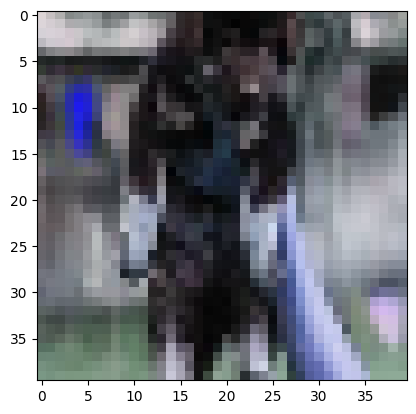

In [12]:
show_image(*dataset[20])

In [13]:
torch.manual_seed(20)
val_size = len(dataset)//10
test_size = len(dataset)//5
train_size = len(dataset) - val_size - test_size

In [14]:
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])
len(train_ds), len(val_ds), len(test_ds)

(7956, 1136, 2273)

In [15]:
batch_size = 35
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=4, pin_memory=True)

In [16]:
m=len(dataset)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

In [17]:
dataset[0][0]

tensor([[[ 66., 102.,  80.,  ...,  91., 176., 216.],
         [ 65.,  62.,  71.,  ...,  95., 198., 166.],
         [ 62.,  47.,  70.,  ..., 115., 184., 114.],
         ...,
         [ 83., 102., 108.,  ..., 194., 221.,  90.],
         [134., 126., 111.,  ..., 148., 142., 138.],
         [117., 120., 103.,  ..., 151., 198., 218.]],

        [[ 80., 117.,  95.,  ..., 108., 196., 230.],
         [ 73.,  73.,  81.,  ..., 113., 217., 180.],
         [ 76.,  63.,  86.,  ..., 133., 204., 128.],
         ...,
         [ 93., 116., 122.,  ..., 196., 225.,  96.],
         [146., 142., 128.,  ..., 147., 144., 145.],
         [130., 139., 126.,  ..., 151., 199., 223.]],

        [[ 52.,  85.,  63.,  ..., 135., 211., 255.],
         [ 63.,  56.,  66.,  ..., 140., 233., 209.],
         [ 47.,  29.,  53.,  ..., 160., 220., 157.],
         ...,
         [144., 177., 197.,  ..., 206., 231.,  94.],
         [224., 229., 224.,  ..., 157., 153., 149.],
         [222., 234., 222.,  ..., 156., 210., 235.]]]

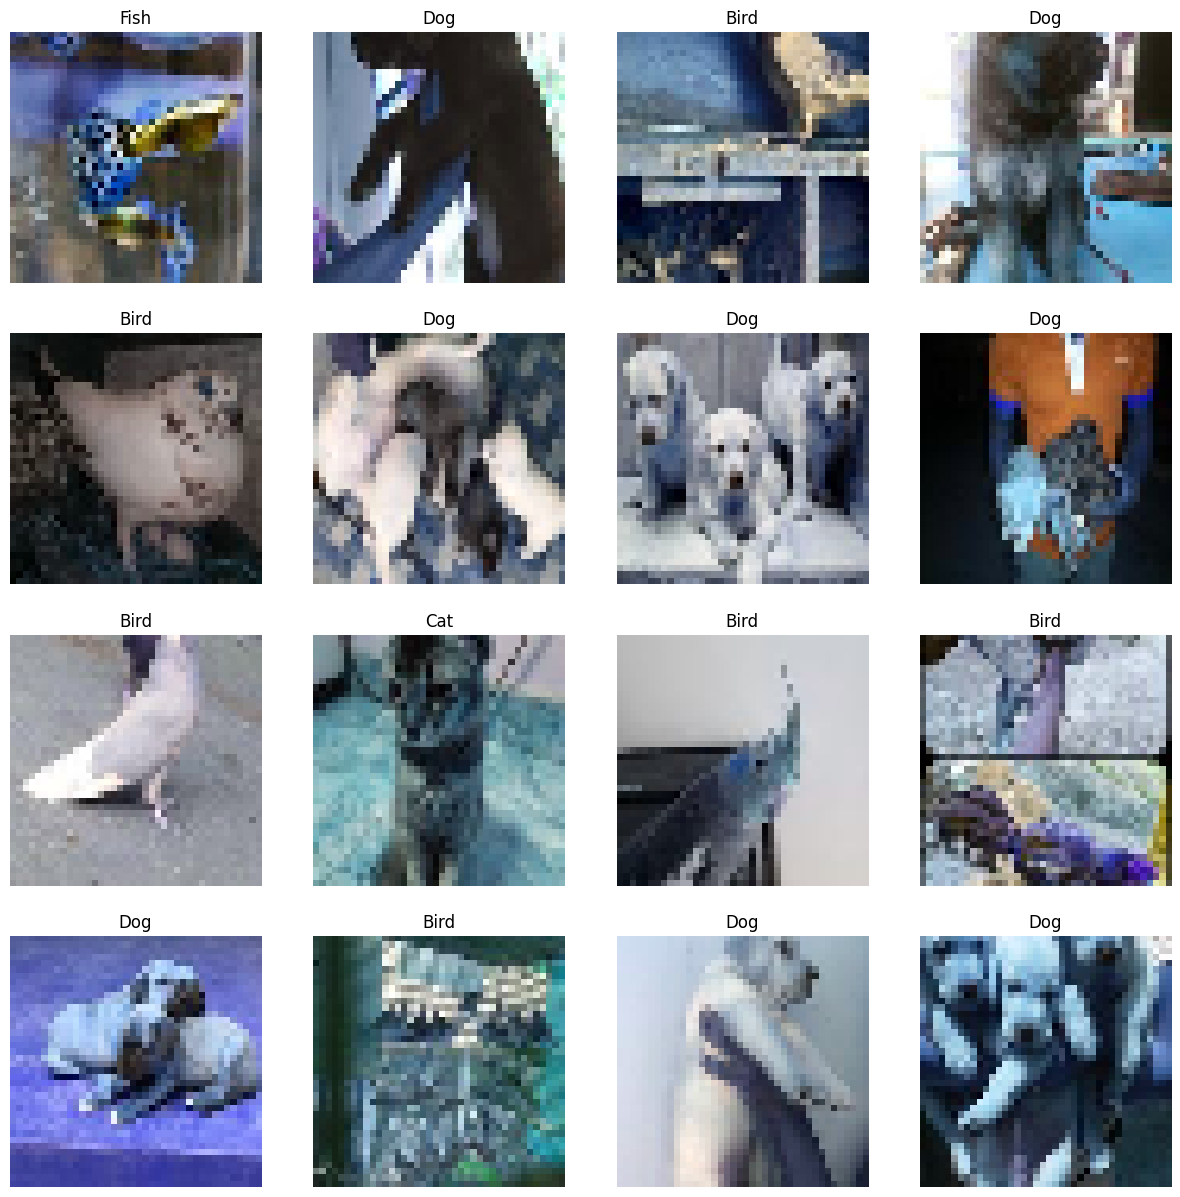

In [18]:
fig, axs = plt.subplots(4,4,figsize=(15,15))
for i in range(16):
    r=i//4
    c=i%4
    img, label = dataset[M[i]]
    ax=axs[r][c].axis("off")
    ax=axs[r][c].set_title(reverse_mapping[label])
    ax=axs[r][c].imshow(img.permute(1,2,0).numpy().astype(int))
plt.show()

In [19]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [20]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [21]:
torch.cuda.is_available()

False

In [22]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [23]:
device = get_default_device()
device

device(type='cpu')

In [24]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [25]:
m=len(dataset)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

In [26]:
input_size = 3*40*40
output_size = len(Name)

In [27]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                   # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [28]:
class CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 100, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(100, 150, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(150, 200, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(200, 200, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(200, 250, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(250, 250, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(), 
            nn.Linear(6250, 64),  
            nn.ReLU(),            
            nn.Linear(64, 32),  
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(32, output_size))
        
    def forward(self, xb):
        return self.network(xb)

In [29]:
model = CnnModel()

In [30]:
model

CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 150, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(150, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(200, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(200, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(250, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=6250, out_features=64, bias=True)
    (17): ReLU()
    (18): Linear(in_features=

In [31]:
for images, labels in train_loader:
    print('images.shape:', images.shape)    
    out = model(images)      
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([35, 3, 40, 40])
out.shape: torch.Size([35, 7])


In [32]:
device = get_default_device()
device

device(type='cpu')

In [33]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model, device)

CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 150, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(150, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(200, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(200, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(250, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=6250, out_features=64, bias=True)
    (17): ReLU()
    (18): Linear(in_features=

In [34]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [35]:
model = to_device(CnnModel(), device)

In [37]:
history=[evaluate(model, val_loader)]
history

KeyboardInterrupt: 

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [ ]:
history+= fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')
    plt.show()
    
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')
    plt.show()

In [ ]:
plot_accuracies(history)

In [ ]:
plot_losses(history)

In [ ]:
evaluate(model, test_loader)

In [ ]:
model.eval()
fig, axs = plt.subplots(4,4,figsize=(15,15))
for i in range(16):
    r=i//4
    c=i%4
    img, label = dataset[M[i]]
    ax=axs[r][c].axis("off")
    ax=axs[r][c].set_title(reverse_mapping[label])
    ax=axs[r][c].imshow(img.permute(1,2,0).numpy().astype(int))
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = []
Y = []
for i, (x,y) in enumerate(test_loader):
    with torch.no_grad():
        outputs = model(x)
    pred += [int(op.argmax()) for op in outputs]
    Y += [int(yi) for yi in y]

print(classification_report(Y, pred))

In [ ]:
torch.save(model.state_dict(), 'animal_image_names.pth')

In [38]:
model = CnnModel()  # Gantilah 'YourModelClass' dengan kelas model Anda.

model.load_state_dict(torch.load('animal_image_names.pth'))

# Pastikan model dalam mode evaluasi jika Anda akan menggunakannya untuk inferensi.
model.eval()

CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 150, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(150, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(200, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(200, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(250, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=6250, out_features=64, bias=True)
    (17): ReLU()
    (18): Linear(in_features=

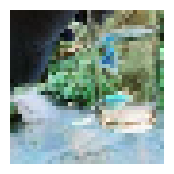

In [76]:
fig, ax = plt.subplots(figsize=(2, 2))

index_to_display = 1112
img, label = dataset[index_to_display]

ax.axis("off")
ax.imshow(img.permute(1, 2, 0).numpy().astype(int))

plt.show()

In [77]:
with torch.no_grad():
    img, label = dataset[index_to_display]
    img = to_device(img.unsqueeze(0), device)  # Menambahkan dimensi batch
    output = model(img)

predicted_class = output.argmax().item()
predicted_label = reverse_mapping[predicted_class]

print(f"Predicted Label: {predicted_label}")

Predicted Label: Fish
